bins 1083.2300007343292


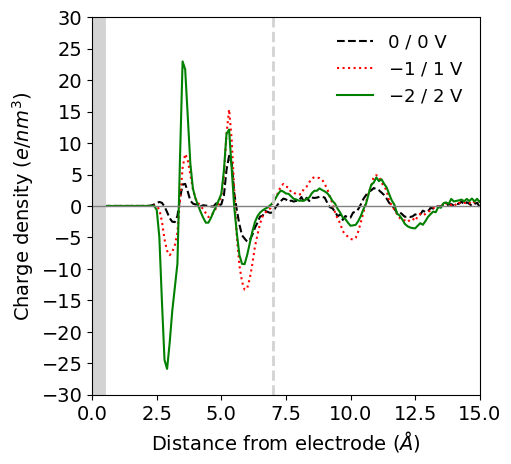

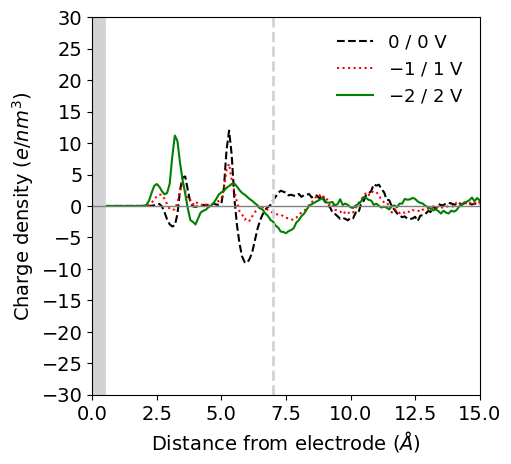

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline
from scipy.integrate import odeint

# this file should contain charge density in e/Ang^3
ifiles = [open("simmd_200step_0V_100ns_300K/hist_q_solution.dat"),
          open("simmd_200step_0.5V_100ns_300K/hist_q_solution.dat"),
          open("simmd_200step_1.5V_100ns_300K/hist_q_solution.dat"),
          open("simmd_200step_2V_100ns_300K/hist_q_solution.dat"),
          open("simmd_200step_2.5V_100ns_300K/hist_q_solution.dat"),
          open("simmd_200step_3V_100ns_300K/hist_q_solution.dat"),
          open("simmd_200step_3.5V_100ns_300K/hist_q_solution.dat"),
          open("simmd_200step_4V_100ns_300K/hist_q_solution.dat")
          #open("simmd_200step_4V_100ns_300K/hist_q_solution.dat"),
          #open("simmd_200step_4.5V_100ns_300K/hist_q_solution.dat")
          #open("simmd_200step_4.5V_100ns_300K/hist_q_solution.dat"),
          #open("simmd_200step_5V_100ns_300K/hist_q_solution.dat")
]

#surfQ= [-0.212543, 0.943114, 3.35758, 4.65059, 10.2933, 11.7742]  # last 60ns
#surfQ_neg= [0.199947, -0.955792, -3.36993, -4.66264, -10.3044, -11.7855]
#surfQ= [-0.212543, 0.943114, 3.35758, 4.65059, 6.37968, 8.69519, 10.2933, 11.7742]  # average electrode charge in e
#surfQ_neg= [0.199947, -0.955792, -3.36993, -4.66264, -6.39165, -8.7069, -10.3044, -11.7855]
#surfQ = [-0.212543, 0.943114, 3.35758, 4.65059, 10.2933, 11.7742, 12.6822, 14.0656]  # average electrode charge in e
#surfQ_neg = [0.199947, -0.955792, -3.36993, -4.66264, -10.3044, -11.7855, -12.693, -14.0761]
#surfQ= [-0.212543, 0.943114, 3.35758, 4.65059, 6.37968, 8.69519, 10.2933, 11.7742, 12.6822, 14.0656]  # average electrode charge in e
#surfQ_neg= [0.199947, -0.955792, -3.36993, -4.66264, -6.39165, -8.7069, -10.3044, -11.7855, -12.693, -14.0761]
#surfQ= [-0.212543, 0.943114, 3.32747, 4.693, 10.333, 11.9017]  # last 50ns
#surfQ_neg= [0.199947, -0.955792, -3.33985, -4.70504,  -10.3441, -11.9129]
#surfQ= [-0.212543, 0.943114, 3.32747, 4.693, 6.37968, 8.69519, 10.333, 11.9017]  # average electrode charge in e
#surfQ_neg= [0.199947, -0.955792, -3.33985, -4.70504, -6.39165, -8.7069, -10.3441, -11.9129]
surfQ= [-0.298397, 0.914293, 3.33301, 4.6787, 6.38963, 8.72662, 10.3443, 12.0278]  # last 40ns
surfQ_neg= [0.28585, -0.927005, -3.34543, -4.69076, -6.40157, -8.73829, -10.3554, -12.039]
#surfQ= [-0.298397, 0.914293, 3.33301, 4.6787,  10.3443, 12.0278]  # last 40ns
#surfQ_neg= [0.28585, -0.927005, -3.34543, -4.69076,  -10.3554, -12.039]
#surfQ= [-0.298397, 0.914293, 3.33301, 4.6787, 8.72662, 10.3443,  12.0278,12.7611]  # last 40ns; 4.5V
#surfQ_neg= [0.28585, -0.927005, -3.34543, -4.69076, -8.73829, -10.3554,  -12.039,-12.7721]
#surfQ= [-0.298397, 0.914293, 3.33301, 4.6787, 6.38963, 8.72662,  12.0278,12.7611]  # last 40ns; 4.5V
#surfQ_neg= [0.28585, -0.927005, -3.34543, -4.69076, -6.40157, -8.73829,  -12.039,-12.7721]
#surfQ= [-0.298397, 0.914293, 3.33301, 4.6787,  6.38963, 8.72662, 10.3443,  12.0278,12.7611,14.0656]  # last 40ns; 5V
#surfQ_neg= [0.28585, -0.927005, -3.34543, -4.69076, -6.40157, -8.73829, -10.3554,  -12.039,-12.7721,-14.0761]
lines_ifiles = [ifiles[i].readlines() for i in range(len(surfQ))]
q_avg = [[] for i in range(len(surfQ))]


#Vapp = [0,0.5,1.5, 2.,3.5, 4.]      # applied potential in volts
Vapp = [0,0.5,1.5, 2.,2.5, 3., 3.5, 4.]
#Vapp = [0,0.5,1.5, 2.,3., 3.5, 4., 4.5]
#Vapp = [0,0.5,1.5, 2.,2.5, 3., 4., 4.5]
#Vapp = [0,0.5,1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]
Lcell = 10.832300007343292*10.  # distance between electrodes in Ang
Lgap = 9.209899992656709*10.  # length of vacuum gap in Ang
dz = 0.1 #width of 1 bin
bins=Lcell/dz
print("bins",bins)
bins=round(Lcell/dz)        # get this from charge_density file
surfaceArea = 2103.158  #surface area of electrode in Ang^2
ang2bohr = 1.88973
nm2bohr = 18.8973

eV2hartree = 0.0367
pi = 3.1415926535
conv = 1/(nm2bohr**3)
for i in range(len(surfQ)):
    for j in range(bins):
        lines_ifiles_idx = lines_ifiles[i][j]
        lines_ifiles_idx_element = lines_ifiles_idx.split()
        q_avg[i].append(float(lines_ifiles_idx_element[1]))

z_dist = []
for j in range(bins):
    z_dist.append( float(j) * dz )

#print(sum(q_avg))
plt.figure(1,figsize=(5,5),dpi=100)
#plt.figure(1)
#plt.subplot(311)
plt.xlim([0, 15.])
plt.xticks(np.arange(0, 16, 2.5),fontsize=14)
plt.xlabel("Distance from electrode ($\AA$)",fontsize=14)
plt.ylim([-30, 30])
plt.yticks(np.arange(-30, 31, 5),fontsize=14)
plt.ylabel("Charge density ($e/nm^3$)",fontsize=14)
linestyles = ['k--','y:','c--','r:','b-.','gold','brown','g-']
volts_legend =['$-$0.25 / 0.25 V', '$-$0.75 / 0.75 V','$-$1 / 1 V', '$-$1.5 / 1.5 V', '$-$2 / 2 V']
#volts_legend =['0 / 0 V','$-$0.25 / 0.25 V', '$-$0.75 / 0.75 V','$-$1 / 1 V', '$-$1.5 / 1.5 V', '$-$2 / 2 V']
plt.plot(z_dist, q_avg[0],linestyles[0])
plt.plot(z_dist, q_avg[3],linestyles[3])
#plt.plot(z_dist, q_avg[4],linestyles[4])
#plt.plot(z_dist, q_avg[-2],linestyles[-2])
plt.plot(z_dist, q_avg[-1],linestyles[-1])
#plt.plot(z_dist, q_avg[6],linestyles[6])
#plt.plot(z_dist, q_avg[7],linestyles[7])
plt.axvline(x=0, color='lightgray', linewidth=20)
#plt.axvline(x=3.5, linestyle='--', color='lightgray', linewidth=2)
plt.axvline(x=7., linestyle='--', color='lightgray', linewidth=2)
plt.axhline(y=0, color='gray', linewidth=1)
#plt.legend(('0.1 V','1.0 V', '1.6 V'), loc='best',fontsize=14,frameon=False)
#plt.legend(('0 V','1V', '1.25 V','1.5 V','1.75 V','2 V'), loc='best',fontsize=11,frameon=False)
plt.legend(('0 / 0 V', '$-$1 / 1 V', '$-$2 / 2 V'), loc='best',fontsize=13,frameon=False)
plt.savefig('chargeden_neatTFSI_posE.eps',bbox_inches = "tight")
plt.show()


#revbins=int(Lcell-15)/dz
#print(Lcell,revbins)
plt.figure(2,figsize=(5,5),dpi=100)
#plt.figure(1)
#plt.subplot(311)
plt.xlim([0,15])
plt.xticks(np.arange(0, 16, 2.5),fontsize=14)
plt.xlabel("Distance from electrode ($\AA$)",fontsize=14)
plt.ylim([-30, 30])
plt.yticks(np.arange(-30, 31, 5),fontsize=14)
plt.ylabel("Charge density ($e/nm^3$)",fontsize=14)
plt.plot(z_dist, q_avg[0][::-1],linestyles[0])   
plt.plot(z_dist, q_avg[3][::-1],linestyles[3])  
#plt.plot(z_dist, q_avg[4][::-1],linestyles[4])  
#plt.plot(z_dist, q_avg[5][::-1],linestyles[5]) 
plt.plot(z_dist, q_avg[-1][::-1],linestyles[-1]) 
plt.axvline(x=0, color='lightgray', linewidth=20)
#plt.axvline(x=3.5, linestyle='--', color='lightgray', linewidth=2)
plt.axvline(x=7., linestyle='--', color='lightgray', linewidth=2)
plt.axhline(y=0, color='gray', linewidth=1)
#plt.legend(('$-$0.4 V','$-$1.0 V', '$-$2.4 V'), loc='best',fontsize=14,frameon=False)
plt.legend(('0 / 0 V','$-$1 / 1 V', '$-$2 / 2 V'), loc='best',fontsize=13,frameon=False)
plt.savefig('chargeden_neatTFSI_negE.eps',bbox_inches = "tight")
plt.show()


[0.0, 0.009175, 0.027525, 0.0367, 0.045875000000000006, 0.05505, 0.064225, 0.0734]


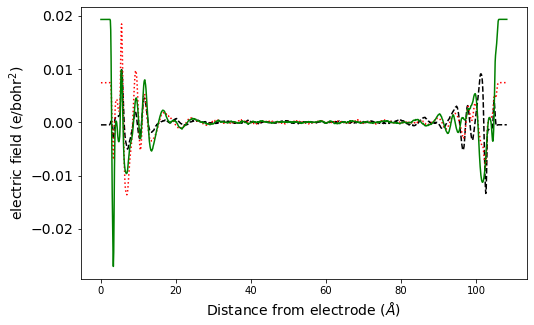

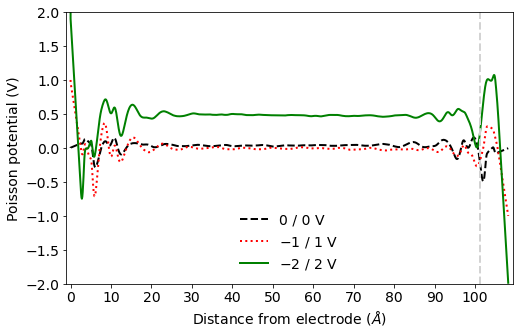

bulk [0.03657542326652451, 0.15685927851202852, -0.019797227287708778, -0.009605748585247667, 0.022688540423431432, 0.1432018304512821, 0.2024756201870596, 0.4805802024039212]
[-0.03657542326652451, 0.09314072148797148, 0.7697972272877088, 1.0096057485852477, 1.2273114595765686, 1.356798169548718, 1.5475243798129403, 1.5194197975960788]
[-0.03657542326652451, -0.4068592785120285, -0.7302027727122912, -0.9903942514147523, -1.2726885404234314, -1.643201830451282, -1.9524756201870597, -2.480580202403921]


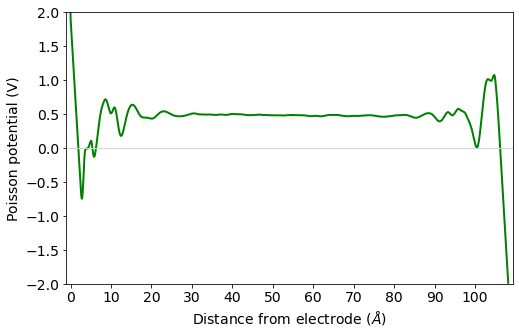

In [8]:
E_surface = [4*pi *Q_i/((surfaceArea)*(ang2bohr**2)) for Q_i in surfQ ]
E_gap = [-(V_i*eV2hartree/(Lgap*ang2bohr)) for V_i in Vapp]
#print(E_surface,E_gap)
E_z = [[] for i in range(len(Vapp))]

E_left = [float(E_surface[i] + E_gap[i]) for i in range(len(Vapp)) ]

for Vapp_i in range(len(E_left)):
    q_avg_temp = q_avg[Vapp_i]
    for z_i in range(len(q_avg[0])):
        E_left[Vapp_i] = E_left[Vapp_i] + 4*pi*q_avg_temp[z_i]*conv*dz*ang2bohr
        E_z[Vapp_i].append(E_left[Vapp_i])
    
z1_dist = [z_dist[i] for i in range(len(E_z[0]))] 
#plt.subplot(312)
plt.figure(figsize=(8,5))
plt.xlabel("Distance from electrode ($\AA$)",fontsize=14)
plt.ylabel("electric field (e/bohr$^2$)",fontsize=14)
plt.yticks(fontsize=14)
plt.plot(z1_dist,E_z[0],linestyles[0])
plt.plot(z1_dist,E_z[3],linestyles[3])
plt.plot(z1_dist,E_z[-1],linestyles[-1])
plt.savefig('Ez_neatTFSI_rough_Vcell0-4V.eps',bbox_inches = "tight")
#plt.plot(z1_dist,E_z[-1],'g-')


# calculate voltage in a.u., store in volts
V_z = [[] for i in range(len(Vapp))]
V_app_i = [(V_i/2) * eV2hartree for V_i in Vapp]
print(V_app_i)

for Vapp_i in range(len(Vapp)):
    V_z[Vapp_i].append(Vapp[Vapp_i]/2)
for Vapp_i in range(len(Vapp)):
    V_app_i_temp = V_app_i[Vapp_i]
    E_z_temp = E_z[Vapp_i]
    for z_i in range(len(E_z[0])):
        V_app_i_temp = V_app_i_temp - E_z_temp[z_i]*dz*ang2bohr
        V_z[Vapp_i].append(V_app_i_temp/eV2hartree)

#z1_dist = [z_dist[i] for i in range(len(E_z[0]))]
z1_dist[:0] = [0]
#plt.subplot(313)
plt.figure(3,figsize=(8,5))
#plt.xlim([0, int(Lcell)])
plt.ylim([-2., 2.])
plt.xlabel("Distance from electrode ($\AA$)",fontsize=14)
plt.ylabel("Poisson potential (V)",fontsize=14)
plt.xticks(np.arange(0, int(Lcell)+1, 10),fontsize=14)
plt.yticks(fontsize=14)
#linestyles =['k-','r-','g-','b--','m--','y--','c--','g--']
linestyles = ['k--','y:','c--','r:','b-.','g-']
plt.plot(z1_dist,V_z[0],linestyles[0],linewidth=2)
#plt.plot(z1_dist,V_z[1],linestyles[1],linewidth=2)
#plt.plot(z1_dist,V_z[2],linestyles[2],linewidth=2)
plt.plot(z1_dist,V_z[3],linestyles[3],linewidth=2)
#plt.plot(z1_dist,V_z[4],linestyles[4],linewidth=2)
#plt.plot(z1_dist,V_z[5],linestyles[5],linewidth=2)
#plt.plot(z1_dist,V_z[-2],linestyles[-2],linewidth=2)
plt.plot(z1_dist,V_z[-1],linestyles[-1],linewidth=2)
#plt.plot(z1_dist,V_z[-1],'g-',linewidth=2)
#plt.axhline(y=0., color='lightgrey', linestyle='-',linewidth=1)
#plt.axvline(x=3.5, linestyle='--', color='lightgray', linewidth=2)
#plt.axvline(x=7., linestyle='--', color='lightgray', linewidth=2)
#plt.axvline(x=float(Lcell-3.5), linestyle='--', color='lightgray', linewidth=2)
plt.axvline(x=float(Lcell-7.), linestyle='--', color='lightgray', linewidth=2)
plt.margins(0.01)  
#volts_legend =['0 / 0 V','$-$0.25 / 0.25 V', '$-$0.75 / 0.75 V','$-$1 / 1 V', '$-$1.75 / 1.75 V', '$-$2 / 2 V']
#volts_legend =['0 / 0 V','$-$0.25 / 0.25 V', '$-$0.75 / 0.75 V','$-$1 / 1 V', '$-$1.25 / 1.25 V', '$-$1.5 / 1.5 V', '$-$1.75 / 1.75 V', '$-$2 / 2 V']
volts_legend =['0 / 0 V','$-$1 / 1 V', '$-$2 / 2 V']
#print(volts)
plt.legend(volts_legend,loc='lower center',fontsize=14,frameon=False)
#plt.legend(('0 / 0 V','$-$0.25 / 0.25 V', '$-$1 / 1 V', '$-$1.5 / 1.5 V', '$-$2 / 2 V'), loc='lower center',fontsize=13,frameon=False)
plt.savefig('poisson_neatTFSI_rough_Vcell0-4V.eps',bbox_inches = "tight")
plt.show()
vBulk = [np.mean(V_z[i][300:800]) for i in range(len(Vapp)) ]
#vBulk = [np.mean(V_z_0V[40:80]),np.mean(V_z_500mV[40:80]),np.mean(V_z_1500mV[40:80]), np.mean(V_z_2V[40:80]),np.mean(V_z_3V[40:80]),np.mean(V_z_3500mV[40:80]), np.mean(V_z_4V[40:80])]
vEDLcat = [(Vapp[i]/2)-vBulk[i] for i in range(len(Vapp))]
vEDLan = [(-Vapp[i]/2)-vBulk[i] for i in range(len(Vapp))]
print("bulk",vBulk)
print(vEDLcat)
print(vEDLan)
vEDLcat_pzc = [ vEDLcat[i]-vEDLcat[0] for i in range(len(Vapp))]
vEDLan_pzc = [ vEDLan[i]-vEDLcat[0] for i in range(len(Vapp))]

#cEDLcat = [abs((surfQ[i])/(vEDLcat[i])) for i in range(1,len(Vapp))]
#cEDLan =  [abs((surfQ[i])/(vEDLan[i])) for i in range(1,len(Vapp))]
cEDLcat = [(surfQ[1]-surfQ[0])/(vEDLcat_pzc[1]-vEDLcat_pzc[0]), (surfQ[3]-surfQ[2])/(vEDLcat_pzc[3]-vEDLcat_pzc[2]), (surfQ[5]-surfQ[4])/(vEDLcat_pzc[5]-vEDLcat_pzc[4])]
cEDLan = [-(surfQ[1]-surfQ[0])/(vEDLan_pzc[1]-vEDLan_pzc[0]), -(surfQ[3]-surfQ[2])/(vEDLan_pzc[3]-vEDLan_pzc[2]), -(surfQ[5]-surfQ[4])/(vEDLan_pzc[5]-vEDLan_pzc[4])]
#cEDLcat = [abs((surfQ[i]-surfQ[i-1])/(vEDLcat[i]-vEDLcat[i-1])) for i in range(1,len(Vapp))]
#cEDLan =  [abs((surfQ[i]-surfQ[i-1])/(vEDLan[i]-vEDLan[i-1])) for i in range(1,len(Vapp))]
#print(vEDLcat_pzc, cEDLcat)
#print(vEDLan_pzc, cEDLan)

plt.figure(4,figsize=(8,5))
#plt.xlim([0, int(Lcell)])
plt.ylim([-2., 2.])
plt.xlabel("Distance from electrode ($\AA$)",fontsize=14)
plt.ylabel("Poisson potential (V)",fontsize=14)
plt.xticks(np.arange(0, int(Lcell)+1, 10),fontsize=14)
plt.yticks(fontsize=14)
plt.plot(z1_dist,V_z[-1],color='green', linestyle='-',linewidth=2)
#plt.plot(z1_dist,V_z[-1],'g-',linewidth=2)
plt.axhline(y=0., color='lightgrey', linestyle='-',linewidth=1)
plt.margins(0.01)  
#volts_legend =['0 / 0 V','$-$0.25 / 0.25 V', '$-$0.75 / 0.75 V','$-$1 / 1 V', '$-$1.75 / 1.75 V', '$-$2 / 2 V']
#volts_legend =['0 / 0 V','$-$0.25 / 0.25 V', '$-$0.75 / 0.75 V','$-$1 / 1 V', '$-$1.25 / 1.25 V', '$-$1.5 / 1.5 V', '$-$1.75 / 1.75 V', '$-$2 / 2 V']
#volts_legend =['0 / 0 V','$-$1 / 1 V', '$-$2 / 2 V']
#print(volts)
#plt.legend(volts_legend,loc='lower center',fontsize=14,frameon=False)
#plt.legend(('0 / 0 V','$-$0.25 / 0.25 V', '$-$1 / 1 V', '$-$1.5 / 1.5 V', '$-$2 / 2 V'), loc='lower center',fontsize=13,frameon=False)
plt.savefig('poisson_neatTFSI_rough_Vcell_4V.eps',bbox_inches = "tight")
plt.show()

15.899879227362025
Vcat_tfsi_neat [0.0, 0.129716144754496, 0.8063726505542334, 1.0461811718517722, 1.2638868828430931, 1.3933735928152424, 1.5840998030794649, 1.5559952208626033]
Van_tfsi_neat [0.0, -0.370283855245504, -0.6936273494457666, -0.9538188281482278, -1.2361131171569069, -1.6066264071847576, -1.9159001969205351, -2.4440047791373964]
[4.916399335118079, 5.96224470926036, 5.887350407092257, 2.7895242707974024, 4.338462284562725, 9.240264718260198, 16.450086904970817]


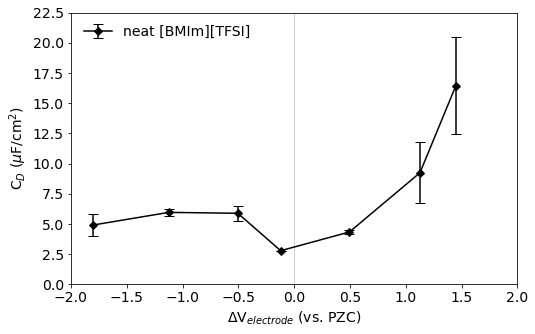

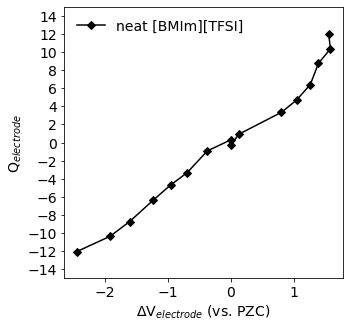

[0.0, 0.129716144754496, 0.8063726505542334, 1.0461811718517722, 1.2638868828430931, 1.3933735928152424, 1.5840998030794649, 1.5559952208626033] [-0.298397, 0.914293, 3.33301, 4.6787, 6.38963, 8.72662, 10.3443, 12.0278]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline
from scipy.integrate import odeint

e2coul = 1.60217646e-19
nm2cm = 1e-7
area = 21.031586279579397*0.756
print(area)
#Vapp = [0,0.5,1.5,2.,3.5,4.]
Vcat=[Vapp[i]/(2) for i in range(len(Vapp))]
Van=[Vapp[i]/(-2) for i in range(len(Vapp))]
#print(Vcat,Van)
Qsurf_tfsi_neat = surfQ
Qneg_tfsi_neat = surfQ_neg
conv = e2coul/(area*nm2cm*nm2cm)/(1e-6)

#Vcat_tfsi_neat = [-0.06794402613767944, 0.17512905536050072, 0.523790822872104, 0.714649668823991, 1.3931578432326241, 1.5716896462892604]
Vcat_tfsi_neat = vEDLcat
Vcat_tfsi_neat =[Vcat_tfsi_neat[i]-Vcat_tfsi_neat[0] for i in range(len(Vcat_tfsi_neat))]
print("Vcat_tfsi_neat",Vcat_tfsi_neat)
cEDLcat_neatTFSI = [(Qsurf_tfsi_neat[i]-Qsurf_tfsi_neat[i-2])/(Vcat_tfsi_neat[i]-Vcat_tfsi_neat[i-2]) for i in range(2,len(Vcat_tfsi_neat))]
cEDLcat_neatTFSI_m = [(cEDLcat_neatTFSI[i]+cEDLcat_neatTFSI[i+1])*0.5 for i in range(0,len(cEDLcat_neatTFSI),2)]
#Van_tfsi_neat = [-0.06794402613767944, -0.3248709446394993, -0.976209177127896, -1.285350331176009, -2.106842156767376, -2.4283103537107396]
Van_tfsi_neat = vEDLan
Van_tfsi_neat =[Van_tfsi_neat[i]-Van_tfsi_neat[0] for i in range(len(Van_tfsi_neat))]
print("Van_tfsi_neat",Van_tfsi_neat)
cEDLan_neatTFSI = [(Qneg_tfsi_neat[i]-Qneg_tfsi_neat[i-2])/(Van_tfsi_neat[i]-Van_tfsi_neat[i-2]) for i in range(2,len(Vcat_tfsi_neat))]
#cEDLan_neatTFSI = [-(Qsurf_tfsi_neat[i]-Qsurf_tfsi_neat[i-2])/(Van_tfsi_neat[i]-Van_tfsi_neat[i-2]) for i in range(2,len(Vcat_tfsi_neat))]
cEDLan_neatTFSI_m = [(cEDLan_neatTFSI[i]+cEDLan_neatTFSI[i+1])*0.5 for i in range(0,len(cEDLan_neatTFSI),2)]
cEDL0V_neatTFSI = Qsurf_tfsi_neat[1]-(Qneg_tfsi_neat[1])/(Vcat_tfsi_neat[1]-Van_tfsi_neat[1])
#cEDL0V_neatTFSI = Qsurf_tfsi_neat[1]-(-Qsurf_tfsi_neat[1])/(Vcat_tfsi_neat[1]-Van_tfsi_neat[1])
# unit conversion
cEDLcat_neatTFSI_SI = [(cEDLcat_neatTFSI[i]*conv) for i in range(len(cEDLcat_neatTFSI))]
cEDL0V_neatTFSI_SI = [float(cEDL0V_neatTFSI*conv)]
cEDLan_neatTFSI_SI = [(cEDLan_neatTFSI[i]*conv) for i in range(len(cEDLan_neatTFSI))]
cEDLcat_neatTFSI_SI_m = [(cEDLcat_neatTFSI_m[i]*conv) for i in range(len(cEDLcat_neatTFSI_m))]
cEDL0V_neatTFSI_SI_m = [float(cEDL0V_neatTFSI*conv)]
cEDLan_neatTFSI_SI_m = [(cEDLan_neatTFSI_m[i]*conv) for i in range(len(cEDLan_neatTFSI_m))]
#vEDL_tfsi_neat = [Van_tfsi_neat[6],Van_tfsi_neat[3],Van_tfsi_neat[1],Vcat_tfsi_neat[1],Vcat_tfsi_neat[3],Vcat_tfsi_neat[6]]
vEDL_tfsi_neat = [(Van_tfsi_neat[i-2]+Van_tfsi_neat[i])*0.5 for i in range(2,len(Van_tfsi_neat))][::-1]+[(Vcat_tfsi_neat[1]+Van_tfsi_neat[1])*0.5]+[(Vcat_tfsi_neat[i-2]+Vcat_tfsi_neat[i])*0.5 for i in range(2,len(Vcat_tfsi_neat))]
#print(len(vEDL_tfsi_neat),vEDL_tfsi_neat, int(len(vEDL_tfsi_neat)/2))
vEDL_tfsi_neat_m = [(vEDL_tfsi_neat[i]+vEDL_tfsi_neat[i+1])*0.5 for i in range(0,len(vEDL_tfsi_neat),2) if i < int(len(vEDL_tfsi_neat)/2)]+[(Vcat_tfsi_neat[1]+Van_tfsi_neat[1])*0.5] + [(vEDL_tfsi_neat[i]+vEDL_tfsi_neat[i+1])*0.5 for i in range(5,len(vEDL_tfsi_neat),2) if i > int(len(vEDL_tfsi_neat)/2)]
cEDL_tfsi_neat = cEDLan_neatTFSI_SI[::-1] + cEDL0V_neatTFSI_SI+ cEDLcat_neatTFSI_SI
cEDL_tfsi_neat_m = cEDLan_neatTFSI_SI_m[::-1] + cEDL0V_neatTFSI_SI_m+ cEDLcat_neatTFSI_SI_m
print(cEDL_tfsi_neat_m)
cEDLcat_neatTFSI_std= [np.std([cEDLcat_neatTFSI[i]*conv,cEDLcat_neatTFSI[i+1]*conv]) for i in range(0,len(cEDLcat_neatTFSI),2)]
cEDL0V_neatTFSI_std = [np.std(cEDL0V_neatTFSI*conv)]
cEDLan_neatTFSI_std= [np.std([cEDLan_neatTFSI[i]*conv,cEDLan_neatTFSI[i+1]*conv]) for i in range(0,len(cEDLan_neatTFSI),2)]
cEDL_tfsi_neat_std = cEDLan_neatTFSI_std[::-1] + cEDL0V_neatTFSI_std + cEDLcat_neatTFSI_std


plt.figure(3,figsize=(8,5))
#plt.xlim([0, 15.])
plt.xticks(np.arange(-4, 4, 0.5),fontsize=14)
plt.xlim([-2., 2.])
plt.xlabel("$\Delta$V$_{electrode}$ (vs. PZC)",fontsize=14)
plt.ylim([0, 22.5])
plt.yticks(fontsize=14)
#plt.yticks(np.arange(0, 13, 2),fontsize=14)
#plt.ylabel("Capacitance ($\mu$F/cm$^2$)",fontsize=14)
plt.ylabel("C$_D$ ($\mu$F/cm$^2$)",fontsize=14)
#plt.plot(vEDL_tfsi_acnt, cEDL_tfsi_acnt,'g:.')
#plt.plot(vEDL_tfsi_dce, cEDL_tfsi_dce,'r--v')
#plt.plot(vEDL_tfsi_neat, cEDL_tfsi_neat,'k-D',linewidth=2)
#plt.plot(vEDL_tfsi_acnt_m, cEDL_tfsi_acnt_m,'k:.')
#plt.plot(vEDL_tfsi_dce_m, cEDL_tfsi_dce_m,'r--v')
#plt.plot(vEDL_tfsi_neat_m, cEDL_tfsi_neat_m,'g-D',linewidth=2)
#plt.errorbar(vEDL_tfsi_acnt_m, cEDL_tfsi_acnt_m, yerr=cEDL_tfsi_acnt_std,fmt='g:o', ecolor='g',capsize=5)
#plt.errorbar(vEDL_tfsi_dce_m, cEDL_tfsi_dce_m, yerr=cEDL_tfsi_dce_std,fmt='r--v', ecolor='r',capsize=5)
plt.errorbar(vEDL_tfsi_neat_m, cEDL_tfsi_neat_m, yerr=cEDL_tfsi_neat_std,fmt='k-D', ecolor='k',capsize=5)
plt.legend(['neat [BMIm][TFSI]'],loc='upper left',fontsize=14,frameon=False)
#plt.legend(('[BMIm][TFSI]/acnt', '[BMIm][TFSI]/dce','neat [BMIm][TFSI]'), loc='best',fontsize=14,frameon=False)
#plt.legend(('C$_{D}$', 'C$_{D}$(avg.)'), loc='best',fontsize=14,frameon=False)
plt.axvline(x=0, color='lightgray', linewidth=1)
plt.savefig('capEDL_Vapp_TFSI_rough.eps',bbox_inches = "tight")
plt.show()

plt.figure(figsize=(5,5))
#plt.xlim([-3., 3.])
plt.xticks(np.arange(-5, 5, 1),fontsize=14)
plt.xlabel("$\Delta$V$_{electrode}$ (vs. PZC)",fontsize=14)
plt.ylim([-15, 15])
plt.yticks(np.arange(-14, 15, 2),fontsize=14)
plt.ylabel("Q$_{electrode}$",fontsize=14)
#plt.plot(Vcat_tfsi_acnt, Qsurf_tfsi_acnt,'g:.')
#plt.plot(Vcat_tfsi_dce, Qsurf_tfsi_dce,'r--v')
plt.plot(Vcat_tfsi_neat, Qsurf_tfsi_neat,'k-D')
plt.plot(Van_tfsi_neat, Qneg_tfsi_neat,'k-D')
plt.legend(['neat [BMIm][TFSI]'],loc='upper left',fontsize=14,frameon=False)
#plt.legend(('[BMIm][TFSI]/acnt', '[BMIm][TFSI]/dce', 'neat [BMIm][TFSI]'), loc='best',fontsize=14,frameon=False)
plt.savefig('Qsurf_Velectrode_TFSI_rough.eps',bbox_inches = "tight")
plt.show()

print(Vcat_tfsi_neat, Qsurf_tfsi_neat)

Vcat_tfsi_neat_flat [0.0, 0.27199948722990236, 0.6626065688662538, 0.8768327783807708, 1.5863836667576132, 1.832906470229743]
Van_tfsi_neat_flat [0.0, -0.22800051277009764, -0.8373934311337462, -1.1231672216192292, -1.9136163332423868, -2.167093529770257]
Vcat_tfsi_neat [0.0, 0.129716144754496, 0.8063726505542334, 1.0461811718517722, 1.2638868828430931, 1.3933735928152424, 1.5840998030794649, 1.5559952208626033]
Van_tfsi_neat [0.0, -0.370283855245504, -0.6936273494457666, -0.9538188281482278, -1.2361131171569069, -1.6066264071847576, -1.9159001969205351, -2.4440047791373964]


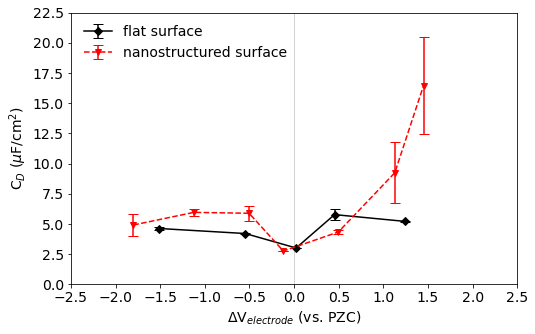

In [4]:
# neat [BMI][TFSI]

e2coul = 1.60217646e-19
nm2cm = 1e-7
area = 21.031586279579397
conv = e2coul/(area*nm2cm*nm2cm)/(1e-6)
conv_r = e2coul/(area*(0.756)*nm2cm*nm2cm)/(1e-6)
Vapp = [0,0.5,1.5,2.,3.5,4.]
Vcat=[Vapp[i]/(2) for i in range(len(Vapp))]
Van=[Vapp[i]/(-2) for i in range(len(Vapp))]
Qsurf_tfsi_neat_flat = [0.0103073,1.31881, 4.6524, 6.25502, 11.0523, 12.7295]
Qsurf_tfsi_neat = surfQ

Vcat_tfsi_neat_flat = [-0.08188672144879605, 0.1901127657811063, 0.5807198474174577, 0.7949460569319747, 1.5044969453088173, 1.7510197487809471]
Vcat_tfsi_neat_flat =[Vcat_tfsi_neat_flat[i]-Vcat_tfsi_neat_flat[0] for i in range(len(Vcat_tfsi_neat_flat))]
print("Vcat_tfsi_neat_flat", Vcat_tfsi_neat_flat)
#Vcat_tfsi_neat = [0.0, 0.24307308149818016, 0.5917348490097835, 0.7825936949616704, 1.276065449337923, 1.4611018693703035, 1.6396336724269398]
cEDLcat_neatTFSI_flat = [(Qsurf_tfsi_neat_flat[i]-Qsurf_tfsi_neat_flat[i-2])/(Vcat_tfsi_neat_flat[i]-Vcat_tfsi_neat_flat[i-2]) for i in range(2,len(Vcat_tfsi_neat_flat))]
cEDLcat_neatTFSI_flat_m = [(cEDLcat_neatTFSI_flat[i]+cEDLcat_neatTFSI_flat[i+1])*0.5 for i in range(0,len(cEDLcat_neatTFSI_flat),2)]
Van_tfsi_neat_flat = [-0.08188672144879605, -0.3098872342188937, -0.9192801525825423, -1.2050539430680254, -1.9955030546911827, -2.248980251219053]
Van_tfsi_neat_flat =[Van_tfsi_neat_flat[i]-Van_tfsi_neat_flat[0] for i in range(len(Van_tfsi_neat_flat))]
print("Van_tfsi_neat_flat", Van_tfsi_neat_flat)
#Van_tfsi_neat = [0.0, -0.2569269185018198, -0.9082651509902165, -1.2174063050383297, -1.723934550662077, -2.0388981306296965, -2.36036632757306]
cEDLan_neatTFSI_flat = [-(Qsurf_tfsi_neat_flat[i]-Qsurf_tfsi_neat_flat[i-2])/(Van_tfsi_neat_flat[i]-Van_tfsi_neat_flat[i-2]) for i in range(2,len(Van_tfsi_neat_flat))]
cEDLan_neatTFSI_flat_m = [(cEDLan_neatTFSI_flat[i]+cEDLan_neatTFSI_flat[i+1])*0.5 for i in range(0,len(cEDLan_neatTFSI_flat),2)]
cEDL0V_neatTFSI_flat = Qsurf_tfsi_neat_flat[1]-(-Qsurf_tfsi_neat_flat[1])/(Vcat_tfsi_neat_flat[1]-Van_tfsi_neat_flat[1])
cEDLcat_neatTFSI_flat_SI = [(cEDLcat_neatTFSI_flat[i]*conv) for i in range(len(cEDLcat_neatTFSI_flat))]
cEDL0V_neatTFSI_flat_SI = [float(cEDL0V_neatTFSI_flat*conv)]
cEDLan_neatTFSI_flat_SI = [(cEDLan_neatTFSI_flat[i]*conv) for i in range(len(cEDLan_neatTFSI_flat))]
cEDLcat_neatTFSI_flat_SI_m = [(cEDLcat_neatTFSI_flat_m[i]*conv) for i in range(len(cEDLcat_neatTFSI_flat_m))]
cEDL0V_neatTFSI_flat_SI_m = [float(cEDL0V_neatTFSI_flat*conv)]
cEDLan_neatTFSI_flat_SI_m = [(cEDLan_neatTFSI_flat_m[i]*conv) for i in range(len(cEDLan_neatTFSI_flat_m))]
#vEDL_tfsi_neat = [Van_tfsi_neat[6],Van_tfsi_neat[3],Van_tfsi_neat[1],Vcat_tfsi_neat[1],Vcat_tfsi_neat[3],Vcat_tfsi_neat[6]]
vEDL_tfsi_neat_flat = [(Van_tfsi_neat_flat[i-2]+Van_tfsi_neat_flat[i])*0.5 for i in range(2,len(Van_tfsi_neat_flat))][::-1]+[(Vcat_tfsi_neat_flat[1]+Van_tfsi_neat_flat[1])*0.5]+[(Vcat_tfsi_neat_flat[i-2]+Vcat_tfsi_neat_flat[i])*0.5 for i in range(2,len(Vcat_tfsi_neat_flat))]
vEDL_tfsi_neat_flat_m = [(vEDL_tfsi_neat_flat[i]+vEDL_tfsi_neat_flat[i+1])*0.5 for i in range(0,len(vEDL_tfsi_neat_flat),2) if i < int(len(vEDL_tfsi_neat_flat)/2)]+[(Vcat_tfsi_neat_flat[1]+Van_tfsi_neat_flat[1])*0.5] + [(vEDL_tfsi_neat_flat[i]+vEDL_tfsi_neat_flat[i+1])*0.5 for i in range(5,len(vEDL_tfsi_neat_flat),2) if i > int(len(vEDL_tfsi_neat_flat)/2)]
cEDL_tfsi_neat_flat = cEDLan_neatTFSI_flat_SI[::-1] + cEDL0V_neatTFSI_flat_SI+ cEDLcat_neatTFSI_flat_SI
cEDL_tfsi_neat_flat_m = cEDLan_neatTFSI_flat_SI_m[::-1] + cEDL0V_neatTFSI_flat_SI_m+ cEDLcat_neatTFSI_flat_SI_m
cEDLcat_neatTFSI_flat_std= [np.std([cEDLcat_neatTFSI_flat[i]*conv,cEDLcat_neatTFSI_flat[i+1]*conv]) for i in range(0,len(cEDLcat_neatTFSI_flat),2)]
cEDL0V_neatTFSI_flat_std = [np.std(cEDL0V_neatTFSI_flat*conv)]
cEDLan_neatTFSI_flat_std= [np.std([cEDLan_neatTFSI_flat[i]*conv,cEDLan_neatTFSI_flat[i+1]*conv]) for i in range(0,len(cEDLan_neatTFSI_flat),2)]
cEDL_tfsi_neat_flat_std = cEDLan_neatTFSI_flat_std[::-1] + cEDL0V_neatTFSI_flat_std + cEDLcat_neatTFSI_flat_std

Vcat_tfsi_neat = [-0.03657542326652451, 0.09314072148797148, 0.7697972272877088, 1.0096057485852477, 1.2273114595765686, 1.356798169548718, 1.5475243798129403, 1.5194197975960788]
Vcat_tfsi_neat =[Vcat_tfsi_neat[i]-Vcat_tfsi_neat[0] for i in range(len(Vcat_tfsi_neat))]
print("Vcat_tfsi_neat",Vcat_tfsi_neat)
#Vcat_tfsi_neat = [0.0, 0.24307308149818016, 0.5917348490097835, 0.7825936949616704, 1.276065449337923, 1.4611018693703035, 1.6396336724269398]
cEDLcat_neatTFSI = [(Qsurf_tfsi_neat[i]-Qsurf_tfsi_neat[i-2])/(Vcat_tfsi_neat[i]-Vcat_tfsi_neat[i-2]) for i in range(2,len(Vcat_tfsi_neat))]
cEDLcat_neatTFSI_m = [(cEDLcat_neatTFSI[i]+cEDLcat_neatTFSI[i+1])*0.5 for i in range(0,len(cEDLcat_neatTFSI),2)]
Van_tfsi_neat = [-0.03657542326652451, -0.4068592785120285, -0.7302027727122912, -0.9903942514147523, -1.2726885404234314, -1.643201830451282, -1.9524756201870597, -2.480580202403921]
Van_tfsi_neat =[Van_tfsi_neat[i]-Van_tfsi_neat[0] for i in range(len(Van_tfsi_neat))]
print("Van_tfsi_neat",Van_tfsi_neat)
#Van_tfsi_neat = [0.0, -0.2569269185018198, -0.9082651509902165, -1.2174063050383297, -1.723934550662077, -2.0388981306296965, -2.36036632757306]
cEDLan_neatTFSI = [-(Qsurf_tfsi_neat[i]-Qsurf_tfsi_neat[i-2])/(Van_tfsi_neat[i]-Van_tfsi_neat[i-2]) for i in range(2,len(Vcat_tfsi_neat))]
cEDLan_neatTFSI_m = [(cEDLan_neatTFSI[i]+cEDLan_neatTFSI[i+1])*0.5 for i in range(0,len(cEDLan_neatTFSI),2)]
cEDL0V_neatTFSI = Qsurf_tfsi_neat[1]-(-Qsurf_tfsi_neat[1])/(Vcat_tfsi_neat[1]-Van_tfsi_neat[1])
# unit conversion
cEDLcat_neatTFSI_SI = [(cEDLcat_neatTFSI[i]*conv_r) for i in range(len(cEDLcat_neatTFSI))]
cEDL0V_neatTFSI_SI = [float(cEDL0V_neatTFSI*conv_r)]
cEDLan_neatTFSI_SI = [(cEDLan_neatTFSI[i]*conv_r) for i in range(len(cEDLan_neatTFSI))]
cEDLcat_neatTFSI_SI_m = [(cEDLcat_neatTFSI_m[i]*conv_r) for i in range(len(cEDLcat_neatTFSI_m))]
cEDL0V_neatTFSI_SI_m = [float(cEDL0V_neatTFSI*conv_r)]
cEDLan_neatTFSI_SI_m = [(cEDLan_neatTFSI_m[i]*conv_r) for i in range(len(cEDLan_neatTFSI_m))]
#vEDL_tfsi_neat = [Van_tfsi_neat[6],Van_tfsi_neat[3],Van_tfsi_neat[1],Vcat_tfsi_neat[1],Vcat_tfsi_neat[3],Vcat_tfsi_neat[6]]
vEDL_tfsi_neat = [(Van_tfsi_neat[i-2]+Van_tfsi_neat[i])*0.5 for i in range(2,len(Van_tfsi_neat))][::-1]+[(Vcat_tfsi_neat[1]+Van_tfsi_neat[1])*0.5]+[(Vcat_tfsi_neat[i-2]+Vcat_tfsi_neat[i])*0.5 for i in range(2,len(Vcat_tfsi_neat))]
vEDL_tfsi_neat_m = [(vEDL_tfsi_neat[i]+vEDL_tfsi_neat[i+1])*0.5 for i in range(0,len(vEDL_tfsi_neat),2) if i < int(len(vEDL_tfsi_neat)/2)]+[(Vcat_tfsi_neat[1]+Van_tfsi_neat[1])*0.5] + [(vEDL_tfsi_neat[i]+vEDL_tfsi_neat[i+1])*0.5 for i in range(5,len(vEDL_tfsi_neat),2) if i > int(len(vEDL_tfsi_neat)/2)]
cEDL_tfsi_neat = cEDLan_neatTFSI_SI[::-1] + cEDL0V_neatTFSI_SI+ cEDLcat_neatTFSI_SI
cEDL_tfsi_neat_m = cEDLan_neatTFSI_SI_m[::-1] + cEDL0V_neatTFSI_SI_m+ cEDLcat_neatTFSI_SI_m
cEDLcat_neatTFSI_std= [np.std([cEDLcat_neatTFSI[i]*conv_r,cEDLcat_neatTFSI[i+1]*conv_r]) for i in range(0,len(cEDLcat_neatTFSI),2)]
cEDL0V_neatTFSI_std = [np.std(cEDL0V_neatTFSI*conv_r)]
cEDLan_neatTFSI_std= [np.std([cEDLan_neatTFSI[i]*conv_r,cEDLan_neatTFSI[i+1]*conv_r]) for i in range(0,len(cEDLan_neatTFSI),2)]
cEDL_tfsi_neat_std = cEDLan_neatTFSI_std[::-1] + cEDL0V_neatTFSI_std + cEDLcat_neatTFSI_std


plt.figure(15,figsize=(8,5))
#plt.xlim([0, 15.])
plt.xticks(np.arange(-4, 4, 0.5),fontsize=14)
plt.xlim([-2.5, 2.5])
plt.xlabel("$\Delta$V$_{electrode}$ (vs. PZC)",fontsize=14)
plt.ylim([0, 22.5])
plt.yticks(np.arange(0, 23, 2.5),fontsize=14)
#plt.ylabel("Capacitance ($\mu$F/cm$^2$)",fontsize=14)
plt.ylabel("C$_D$ ($\mu$F/cm$^2$)",fontsize=14)
#plt.plot(vEDL_tfsi_acnt, cEDL_tfsi_acnt,'g:o')
#plt.plot(vEDL_tfsi_neat_flat, cEDL_tfsi_neat_flat,'k-D',linewidth=2)
#plt.plot(vEDL_tfsi_neat, cEDL_tfsi_neat,'r--v',linewidth=2)
#plt.errorbar(vEDL_tfsi_acnt_m, cEDL_tfsi_acnt_m, yerr=cEDL_tfsi_acnt_std,fmt='g:o', ecolor='g',capsize=5)
plt.errorbar(vEDL_tfsi_neat_flat_m, cEDL_tfsi_neat_flat_m, yerr=cEDL_tfsi_neat_flat_std,fmt='k-D', ecolor='k',capsize=5)
plt.errorbar(vEDL_tfsi_neat_m, cEDL_tfsi_neat_m, yerr=cEDL_tfsi_neat_std,fmt='r--v', ecolor='r',capsize=5)
plt.legend(('flat surface','nanostructured surface'), loc='best',fontsize=14,frameon=False)
plt.axvline(x=0, color='lightgray', linewidth=1)
plt.savefig('capEDL_Vapp_TFSI_flat_vs_rough.eps',bbox_inches = "tight")
plt.show()